# GEO Data processing

![](./images/Module1/Data_Processing.png)

## Learning Objectives:
1. Understand the type of data that is accessible from GEO.
2. Demonstrate how to navigate the GEO website, search for dataset using accession number, and select samples.
3. Use the command-line interface to copy over data from GEO.
4. Perform data pre-processing and normalization

## Accessing public GEO sequencing data
The Gene Expression Omnibus (GEO) is a public repository that archives and freely distributes comprehensive sets of microarray,
next-generation sequencing, and other forms of high-throughput functional genomic data submitted by the scientific community.
In addition to data storage, the website prodide set of web-based tools and applications to help users query and download the
studies and gene expression patterns stored in GEO.

### Searching and accessing data on GEO
Searching for GEO is relatively straight forward via GEO website. First, users need to navigate to  <a href="https://www.ncbi.nlm.nih.gov/geo/">https://www.ncbi.nlm.nih.gov/geo/</a>.
There are multiple ways for searching datasets but the simples way is to provide the accession number in the search box.
We will use an example dataset with the accession number <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE48350">GSE48350</a> for demonstration.
The GEO website interface with searching procedure for the example date are shown in the figure below:

![](./images/Module1/GEO_Website.png)

When the searching process is done, a webpage with detailed description of the example dataset such as published date, title, organism, experiment type, dataset summary etc. will be shown in the figure below:

![](./images/Module1/GEO_Dataset_Page.png)

We can see that the dataset GSE48350 was published in Apr 21, 2014 which focuses on Human Alzheimer's
Disease using microarray sequencing technology. Samples were primary collected from 4 brain regions:
hippocampus (HC), entorhinal cortex (EC), superior frontal cortex (SCG), post-central gyrus (PCG)
of normal and disease patients.

### Downloading data using web-interface
At the bottom of the dataset page, users will find additional information about the dataset such as sequencing platform, number of samples, project ID and links to download the expression data. The exact places to find this information are shown in the figure below:

![](./images/Module1/Manual_Download.png)

As presented in the figure, the dataset GSE48350 were sequenced using Affymetrix Human Genome U133 Plus 2.0 Array and the whole dataset contains 253 samples. The summary table at the bottom of the page show the all the data generated rom the experiment.  User can click to "(http)" hyperlink to download all the samples or click "(custom)" to select and download the samples of interest. Note that, expression data download from this step are raw data and additional data processing need to be done locally for further analysis.

### Downloading data using R command line

If the users have programming background, it is more beneficial to automate the downloading task using R's command line. Getting data from GEO is really quite easy using <a href="https://bioconductor.org/packages/release/bioc/html/GEOquery.html">GEOquery</a> R package available in <a href="https://bioconductor.org/">Bioconductor</a>. Before starting, user need to install GEOquery package using the following command.

In [3]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
f::install("GEOquery", update = F)

Bioconductor version '3.14' is out-of-date; the current release version '3.15'
  is available with R version '4.2'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GEOquery'"
Old packages: 'AnnotationHub', 'BiocFileCache', 'BiocManager', 'DBI', 'DT',
  'ExperimentHub', 'FNN', 'GPArotation', 'GenomeInfoDb', 'R.methodsS3', 'R.oo',
  'R.utils', 'R2HTML', 'RColorBrewer', 'RCurl', 'RSQLite', 'RSpectra',
  'RcppArmadillo', 'RcppEigen', 'Rtsne', 'Rttf2pt1', 'S4Vectors', 'SCFA',
  'Seurat', 'SeuratObject', 'XML', 'ade4', 'blob', 'broom', 'car', 'cli',
  'clipr', 'clusterSim', 'colorspace', 'crayon', 'dbplyr', 'desc', 'devEMF',
  'doParallel', 'dplyr', 'e1071', '

We can use the `getGEO` function from the `GEOquery` package to download GEO dataset. First, users have to specify the accession ID of the dataset. For demonstration, we will use the same dataset `GSE48350`.

In [59]:
library("GEOquery")
## change my_id to be the dataset that you want.
my_id <- "GSE48350"
gse <- getGEO(my_id)

Found 1 file(s)

GSE48350_series_matrix.txt.gz

Using locally cached version: C:\Users\bangt\AppData\Local\Temp\Rtmp6VlurD/GSE48350_series_matrix.txt.gz

Using locally cached version of GPL570 found here:
C:\Users\bangt\AppData\Local\Temp\Rtmp6VlurD/GPL570.soft.gz 



Some datasets on GEO may be derived from different microarray platforms. Therefore the object `gse` is a list of different datasets.
You can find out how many were used by checking the length of the `gse` object.

In [63]:
## check how many platforms used
length(gse)


[1] 1

The result shows that we have only one dataset that belongs to microarray platform mentioned GEO dataset page. Then, we can access the first object in the list and explore the samples and genes metadata using the command below:

In [80]:
# if more than one dataset is present, users can analyse the other dataset by changing the number inside the [[...]]
data <- gse[[1]]
# Get the samples information
samples = pData(data)
# Get the genes information
genes = fData(data)
# View the first 5 samples/genes with some of their features
samples[1:4,1:5]
genes[1:5,1:5]

,title,geo_accession,status,submission_date,last_update_date
,<chr>,<chr>,<chr>,<chr>,<chr>
GSM300166,PostcentralGyrus_female_91yrs_indiv10,GSM300166,Public on Oct 09 2008,Jun 25 2008,Jun 26 2019
GSM300167,SuperiorFrontalGyrus_female_91yrs_indiv10,GSM300167,Public on Oct 09 2008,Jun 25 2008,Jun 26 2019
GSM300168,Hippocampus_female_96yrs_indiv105,GSM300168,Public on Oct 09 2008,Jun 25 2008,Jun 26 2019
GSM300169,Hippocampus_male_82yrs_indiv106,GSM300169,Public on Oct 09 2008,Jun 25 2008,Jun 26 2019


,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date
,<chr>,<chr>,<chr>,<chr>,<chr>
1007_s_at,1007_s_at,U48705,,Homo sapiens,"Oct 6, 2014"
1053_at,1053_at,M87338,,Homo sapiens,"Oct 6, 2014"
117_at,117_at,X51757,,Homo sapiens,"Oct 6, 2014"
121_at,121_at,X69699,,Homo sapiens,"Oct 6, 2014"
1255_g_at,1255_g_at,L36861,,Homo sapiens,"Oct 6, 2014"


## Data normalization
In this section, we will inspect the data to discover what scale the data are presented in. The methods we will use later in this training series assume the data are on a `log2` scale; typically in the range of `0` to `16`.

The `exprs` function can retrieve the expression values as a data frame; with one column per-sample and one row per-gene. To view the expression value of the first 5 samples, we can use the following command:

In [78]:
head(exprs(data)[,1:5])

,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170
1007_s_at,0.8880162,1.4355185,1.6096015,1.754960,1.820730
1053_at,0.6664604,0.8858521,1.8590777,1.036666,1.421393
117_at,0.8596384,1.0620298,3.0973945,2.243655,5.060301
121_at,0.9751495,1.0507448,0.9822838,1.198237,1.039529
1255_g_at,0.4912547,0.5375254,3.1796446,1.514290,2.185801
1294_at,0.8344268,0.9291890,1.5193694,1.557089,1.641263


The `summary` function can then be used to print the distributions of each sample and the `range` function can help to check for the expression value range.

In [77]:
summary(exprs(data)[,1:5])
range(exprs(data))

   GSM300166          GSM300167          GSM300168         GSM300169       
 Min.   :  0.0100   Min.   :  0.0100   Min.   : 0.0100   Min.   : 0.01942  
 1st Qu.:  0.6366   1st Qu.:  0.6519   1st Qu.: 0.3342   1st Qu.: 0.32045  
 Median :  0.8622   Median :  0.8828   Median : 0.7756   Median : 0.75063  
 Mean   :  0.9193   Mean   :  0.9492   Mean   : 0.9274   Mean   : 0.87928  
 3rd Qu.:  1.0903   3rd Qu.:  1.0880   3rd Qu.: 1.1929   3rd Qu.: 1.15987  
 Max.   :335.6746   Max.   :531.7116   Max.   :99.4657   Max.   :26.46015  
   GSM300170       
 Min.   : 0.01098  
 1st Qu.: 0.32324  
 Median : 0.77234  
 Mean   : 0.93768  
 3rd Qu.: 1.21978  
 Max.   :83.41583  

[1]    0.010 1438.763

From this output we clearly see that the values go beyond `16`, so we will need to perform a $log_2$ transformation. A `boxplot` can also be generated to see if the data have been normalised. If so, the distributions of each sample should be highly similar.

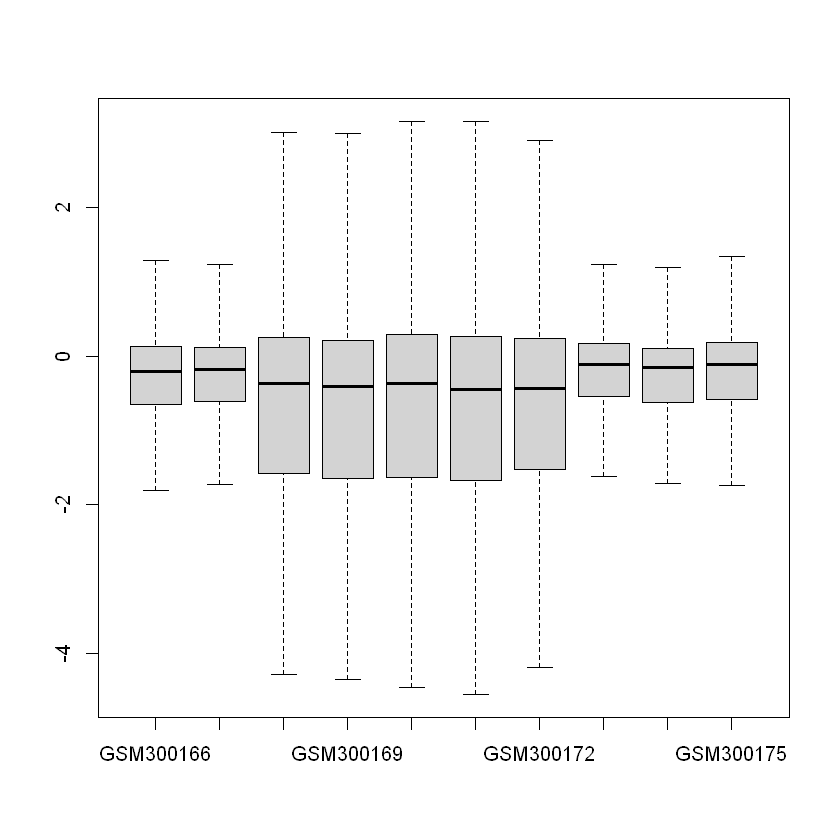

In [75]:
# Get expression matrix
ex <- exprs(data)
# Calculate data quantile and remove the NA value
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
  (qx[6]-qx[1] > 50 && qx[2] > 0)
if (LogC) { ex[which(ex <= 0)] <- NaN
norm_ex <- log2(ex) }
# Plot the boxplot of 10 samples
boxplot(norm_ex[,1:10],outline=FALSE)

## Exporting the data
We can export the expression data to a `csv` for inspection in other software such as Excel using the `write_csv` function from `readr`. For demonstration purpose, we will save the expression data of the first 10 samples with 10 genes into disk.

In [92]:
# If users have installed readr package, please uncomment the line below to do so.
# install.packages("readr")
library(readr)
# Select 10 samples and 10 genes
norm_ex <- as.data.frame(norm_ex[1:10,1:10])
# Save expresion values to the csv format
write_csv(norm_ex, file="./data/GSE48350.csv")

The `csv` format is a very simple format that might not suitable to store big dataset. We can export expression data to `rds` format so that is more memory efficient to read and write the data. We can do that using built in `saveRDS` function.


In [93]:
# Save expresion values to the rds format
saveRDS(norm_ex, file="./data/GSE48350.rds")
